Number of symmetric curves detected: 27


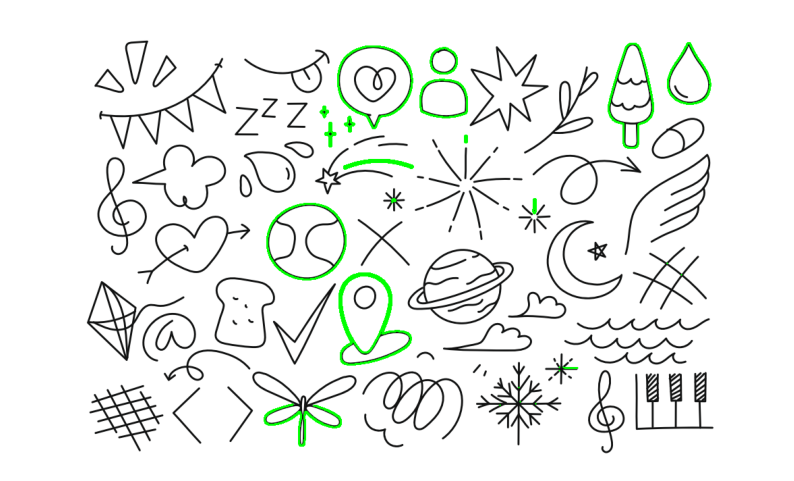

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to identify and count symmetric curves
def detect_symmetric_curves(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize symmetric curve count
    symmetric_curve_count = 0

    # Loop over each contour
    for contour in contours:
        # Create a mask from the contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)

        # Get the bounding box and extract the ROI
        x, y, w, h = cv2.boundingRect(contour)
        roi = mask[y:y+h, x:x+w]

        # Flip the ROI horizontally and vertically
        roi_flipped_horizontally = cv2.flip(roi, 1)
        roi_flipped_vertically = cv2.flip(roi, 0)

        # Compare original ROI with its flipped versions
        horizontal_symmetry = np.mean(roi == roi_flipped_horizontally)
        vertical_symmetry = np.mean(roi == roi_flipped_vertically)

        # Consider a contour symmetric if it is sufficiently similar to its flipped version
        if horizontal_symmetry > 0.9 or vertical_symmetry > 0.9:
            symmetric_curve_count += 1
            cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

    # Print the number of symmetric curves detected
    print(f"Number of symmetric curves detected: {symmetric_curve_count}")

    # Convert the image to RGB format for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the output image
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

# Main function
if __name__ == "__main__":
    image_path = "Screenshot (59).png"  # Replace with your image path
    detect_symmetric_curves(image_path)